## K-MEANS CLUSTERING ALGORITHM

**K-means clustering** *is a very famous and powerful unsupervised machine learning algorithm that is used to solve many complex unsupervised machine learning problems.*

*A K-means clustering algorithm tries to group similar items in the form of clusters. The number of groups is represented by K.*

### How Does the K-means clustering algorithm work?

K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in three steps. i.e.

**1.Select the k values.**

**2.Initialize the centroids.**
  
**3.Select the group and find the average.**

### The diagram below gives a brief idea of how the K-means algorithm works.

![K-Means Clustering Algorithm](k-means-clustering.jpg)

### Advantages of K-means

**1.It is very simple to implement.**

**2.It is scalable to a huge data set and also faster to large datasets.**

**3.It adapts the new examples very frequently.**

**4.Generalization of clusters for different shapes and sizes.**
 

### Disadvantages of K-means

**1.It is sensitive to the outliers.**

**2.Choosing the k values manually is a tough job.**

**3.As the number of dimensions increases its scalability decreases.**


### Implementing K-Means

In [1]:
using Statistics
using Plots

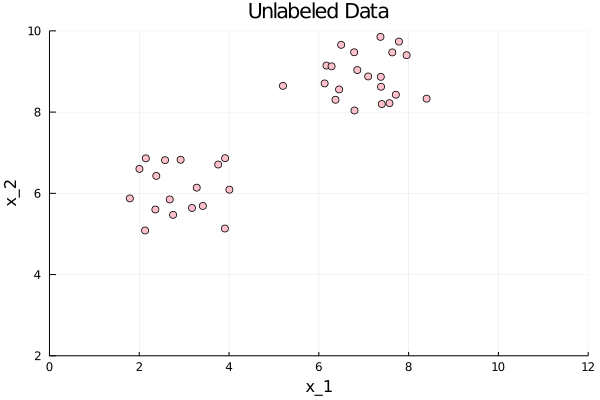

In [4]:
#How to form a circle
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    return h.+r*sin.(θ), k.+r*cos.(θ)
end

#Assume the center of cluster1 is (3, 6) with radius 1.8
cluster1 = [(3 + (-1)^rand(1:2)*rand(1:2)*rand(), 6 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]


#Assume the center of cluster2 is (7, 9) with radius 2.2
cluster2 = [(7 + (-1)^rand(1:2)*rand(1:2)*rand(), 9 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

#Make the full data set of unlabeled points
data = copy(cluster1)
for x in cluster2
    push!(data, x)
end

#Plot the data
plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 10),
     title = "Unlabeled Data")
scatter!(data, color = "pink")

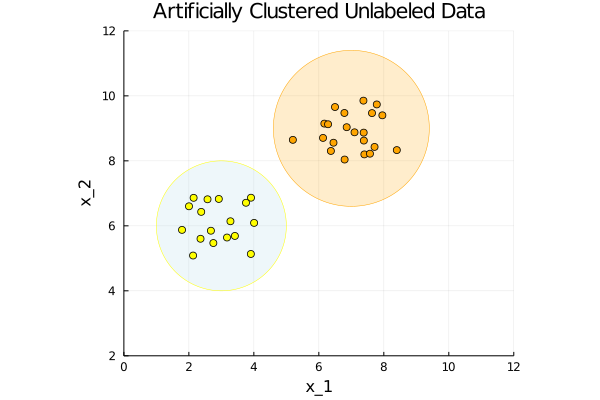

In [7]:
plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 12),
     title = "Artificially Clustered Unlabeled Data")


plot!(circleShape(3, 6, 2.0),
      seriestype = [:shape, ],
      lw = 0.5,
      c = "lightblue",
      linecolor = "yellow",
      legend = false,
      fillalpha = 0.2,
      aspect_ratio = 1,)

plot!(circleShape(7, 9, 2.4),
      seriestype = [:shape, ],
      lw = 0.5,
      c = "orange",
      linecolor = "orange",
      legend = false,
      fillalpha = 0.2,
      aspect_ratio = 1)

scatter!(cluster1,
         color = "yellow",
         legend = false)

scatter!(cluster2,
         color = "orange",
         legend = false)



In [8]:
function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1: length(p1)]))
end;

In [9]:
function k_means_distances(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
        end
        return distances
end;

In [10]:
function k_means_clusters(X, centroids, k)
    distances = k_means_distances(X, centroids, k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
            end
        end
    end
    return clusters
end;

In [11]:
function k_means_new_centroids(X, centroids, k)
    clusters = k_means_clusters(X, centroids, k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(new_centers, point)
    end
    return new_centers
end;

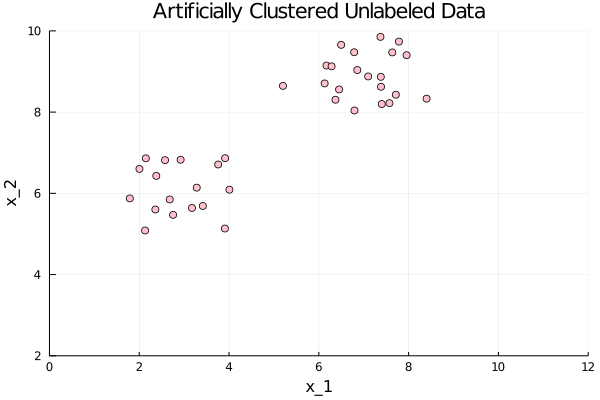

In [13]:
plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 10),
     title = "Artificially Clustered Unlabeled Data")

scatter!(cluster1,
         color = "pink",
         legend = false)

scatter!(cluster2,
         color = "pink",
         legend = false)


In [14]:
function k_means_new_centroids(X, centroids, k)
    clusters = k_means_clusters(X, centroids, k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(new_centers, point)
    end
    return new_centers
end;

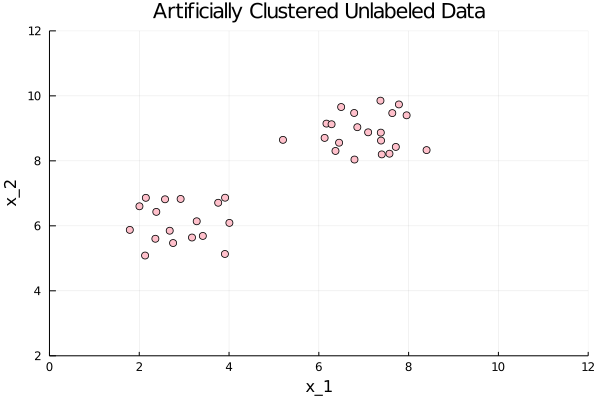

In [18]:
plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 12),
     title = "Artificially Clustered Unlabeled Data")

scatter!(cluster1,
         color = "pink",
         legend = false)

scatter!(cluster2,
         color = "pink",
         legend = false)



[(10, 7), (1, 3)]


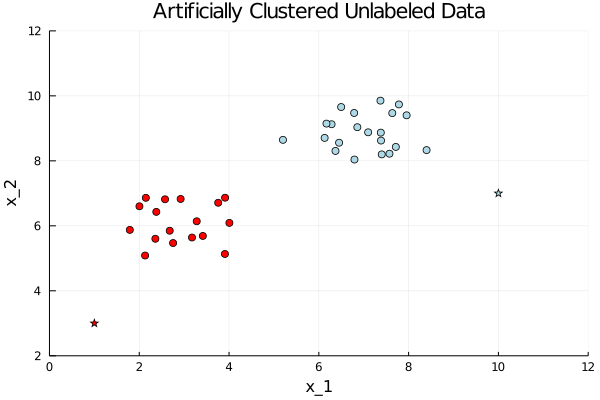

In [17]:
#Test your functions (k = 2)
initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]
println(initial_centroids)

clusters = k_means_clusters(data, initial_centroids, 2)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 12),
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)
scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "red", shape = :star5)

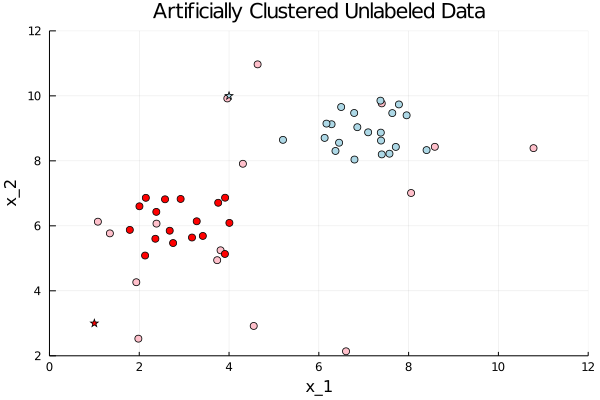

In [49]:
centroids_test = k_means_new_centroids(data, initial_centroids, 2)

clusters = k_means_clusters(data, centroids_test, 2)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 12),
     title = "Artificially Clustered Unlabeled Data")

scatter!(cluster1,
         color = "pink",
         legend = false)

scatter!(cluster2,
         color = "pink",
         legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)
scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "red", shape = :star5)


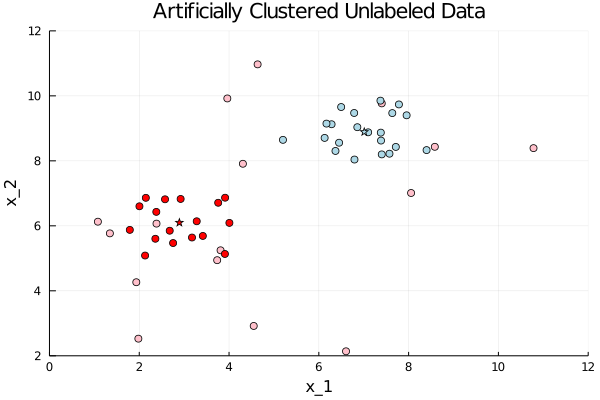

In [50]:
centroids_test = k_means_new_centroids(data, centroids_test, 2)

clusters = k_means_clusters(data, centroids_test, 2)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 12),
     title = "Artificially Clustered Unlabeled Data")

scatter!(cluster1,
         color = "pink",
         legend = false)

scatter!(cluster2,
         color = "pink",
         legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)
scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "red", shape = :star5)


[(8, 10), (4, 9), (4, 4)]


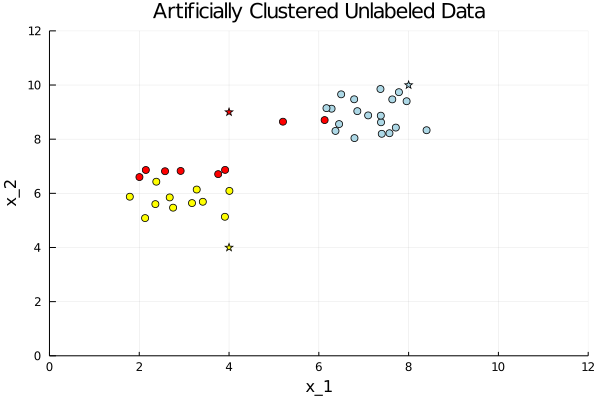

In [54]:
#Test your functions (k = 3)
initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]
println(initial_centroids)

clusters = k_means_clusters(data, initial_centroids, 3)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (0, 12),
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)
scatter!([x for x in keys(clusters) if clusters[x] ==3],
        color = "yellow",
        legend = false)
scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "red", shape = :star5)
scatter!([initial_centroids[3]], color = "yellow", shape = :star5)

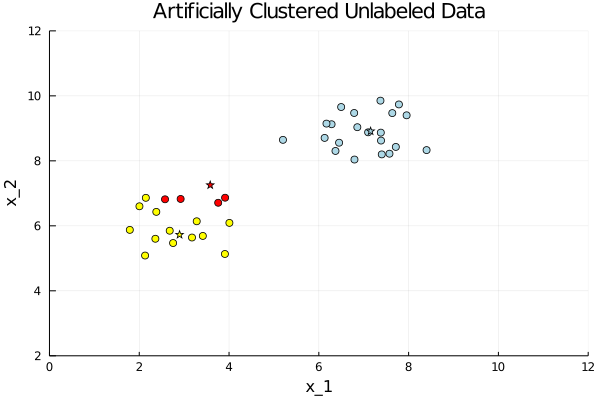

In [55]:
centroids_test = k_means_new_centroids(data, initial_centroids, 3)

clusters = k_means_clusters(data, centroids_test, 3)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 12),
     title = "Artificially Clustered Unlabeled Data")


scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)
scatter!([x for x in keys(clusters) if clusters[x] ==3],
        color = "yellow",
        legend = false)
scatter!([centroids_test[1]], color = "lightblue", shape = :star5)
scatter!([centroids_test[2]], color = "red", shape = :star5)
scatter!([centroids_test[3]], color = "yellow", shape = :star5)

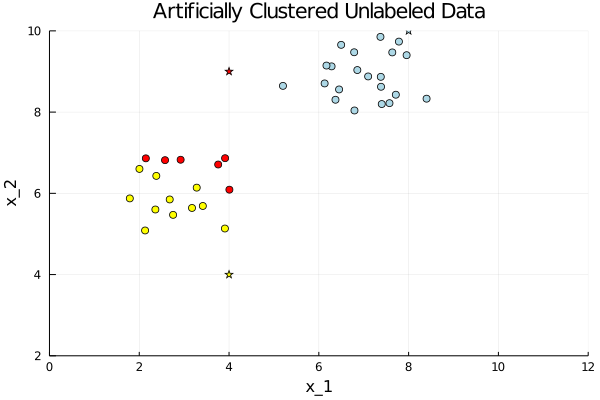

In [56]:
centroids_test = k_means_new_centroids(data, centroids_test, 3)

clusters = k_means_clusters(data, centroids_test, 3)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 10),
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)
scatter!([x for x in keys(clusters) if clusters[x] ==3],
        color = "yellow",
        legend = false)
scatter!([initial_centroids[1]], color = "lightblue", shape = :star5)
scatter!([initial_centroids[2]], color = "red", shape = :star5)
scatter!([initial_centroids[3]], color = "yellow", shape = :star5)

In [57]:
function k_means_algorithm(X, k, ϵ; return_centroids = false)
    
    centroids = []
    for _ = 1:k
        i = rand(1:length(X))
        j = rand(1:length(X))/length(X)
        push!(centroids, (X[i][1] + j, X[i][2] - j))
    end
    
    #Now for the k-means algorithm 
    new_centroids = k_means_new_centroids(X, centroids, k)
    j = 1
    while maximum([euclidean_distance(centroids[i], new_centroids[i]) for i = 1:k]) > ϵ && j < 1000000
        centroids, new_centroids = new_centroids, k_means_new_centroids(X, new_centroids, k)
        j += 1
    end
    
    if return_centroids == false
        return k_means_clusters(X, new_centroids, k)
    else
        return new_centroids
    end
end;

In [58]:
#Test your function
k_means_algorithm(data, 2, 0.0001)

Dict{Any,Any} with 38 entries:
  (2.13012, 5.08552) => 2
  (3.90796, 5.13368) => 2
  (6.45136, 8.55771) => 1
  (1.78964, 5.8749)  => 2
  (2.67858, 5.84921) => 2
  (6.1293, 8.70572)  => 1
  (6.28391, 9.1258)  => 1
  (2.7538, 5.4701)   => 2
  (7.38549, 8.62365) => 1
  (6.79402, 8.03987) => 1
  (3.17485, 5.63987) => 2
  (2.37999, 6.42937) => 2
  (2.92166, 6.827)   => 2
  (4.00793, 6.09008) => 2
  (2.00417, 6.601)   => 2
  (7.78384, 9.73573) => 1
  (6.78727, 9.47308) => 1
  (7.715, 8.42806)   => 1
  (7.37277, 9.85236) => 1
  (3.28005, 6.13997) => 2
  (2.57429, 6.81651) => 2
  (8.4002, 8.33046)  => 1
  (2.14661, 6.86163) => 2
  (2.35904, 5.60175) => 2
  (5.20105, 8.64563) => 1
  ⋮                  => ⋮

In [59]:
#Test your function
k_means_algorithm(data, 2, 0.0001, return_centroids = true)

2-element Array{Any,1}:
 (2.8938522259939723, 6.099052425973804)
 (7.0117476242448875, 8.890187151276255)

In [60]:
function predict(point, X, k, ϵ)
    centroids = k_means_algorithm(X, k, ϵ, return_centroids = true)
    clusters = k_means_algorithm(X, k, ϵ)
    print("Predicted class of point ", string(point), " is ")
    println("Class ", string(clusters[point]))
end;

In [61]:
predict(data[1], data, 2, 0.1)

Predicted class of point (3.416203786305843, 5.688632630519916) is Class 2


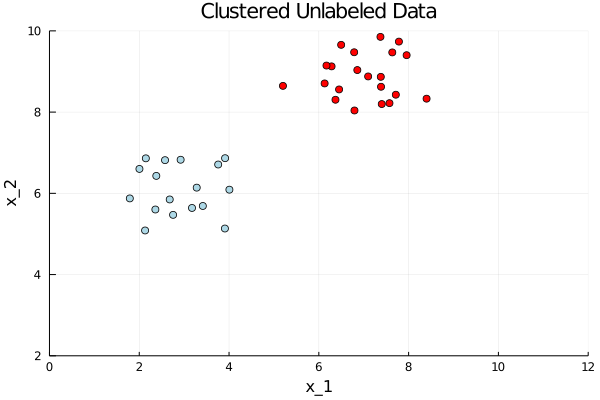

In [62]:
clusters = k_means_algorithm(data, 2, 0.0001)

plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 12),
     ylabel = "x_2",
     ylim = (2, 10),
     title = "Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "red",
        legend = false)

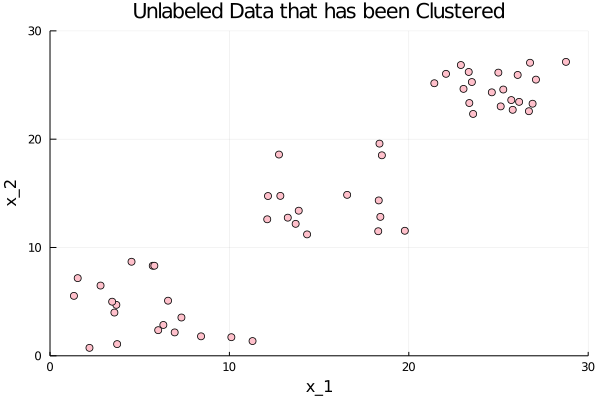

In [65]:
#Assume the center of cluster1 is (5, 10) 
cluster1 = [(rand(1:10) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(1:10) + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:19]


#Assume the center of cluster2 is (10, 12) 
cluster2 = [(rand(12:20) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(12:20) + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:15]

#Assume the center of cluster2 is (20, 22) 
cluster3= [(rand(23:27) + (-1)^rand(1:2)*rand(1:2)*rand(), rand(23:27) + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

#Make the full data set of unlabeled points
data_new = copy(cluster1)
for x in cluster2
    push!(data_new, x)
end
for x in cluster3
    push!(data_new, x)
end

#Plot the data
plot(legend = false,
     xlabel = "x_1",
     xlim = (0, 30),
     ylabel = "x_2",
     ylim = (0, 30),
     title = "Unlabeled Data that has been Clustered")

scatter!(data_new, color = "pink")

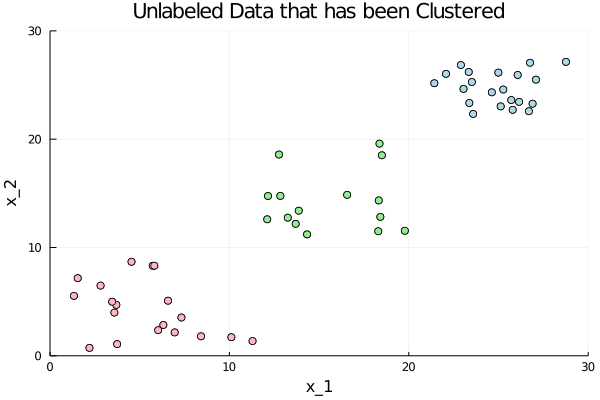

In [66]:
clusters = k_means_algorithm(data_new, 3, 0.0001)


scatter!([x for x in keys(clusters) if clusters[x] ==1],
        color = "lightpink",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==2],
        color = "lightblue",
        legend = false)

scatter!([x for x in keys(clusters) if clusters[x] ==3],
        color = "lightgreen",
        legend = false)